In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory(
        "./DATASET/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 640 images belonging to 2 classes.


In [4]:
datagen1 = ImageDataGenerator(rescale=1./255)

test_set = datagen1.flow_from_directory(
        "./DATASET/",
        target_size=(64, 64),
        batch_size=32,
        class_mode="binary"
      )

Found 640 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.regularizers import l2


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [13]:
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])


In [16]:
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
20/20 [==============================] - 7s 305ms/step - loss: 0.9770 - accuracy: 0.5000 - val_loss: 0.8209 - val_accuracy: 0.5000
Epoch 2/15
20/20 [==============================] - 3s 164ms/step - loss: 0.7395 - accuracy: 0.5828 - val_loss: 0.3015 - val_accuracy: 1.0000
Epoch 3/15
20/20 [==============================] - 3s 164ms/step - loss: 0.3606 - accuracy: 0.8547 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 4/15
20/20 [==============================] - 3s 165ms/step - loss: 0.1164 - accuracy: 0.9688 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 5/15
20/20 [==============================] - 3s 170ms/step - loss: 0.0865 - accuracy: 0.9703 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 6/15
20/20 [==============================] - 3s 165ms/step - loss: 0.0714 - accuracy: 0.9781 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 7/15
20/20 [==============================] - 3s 163ms/step - loss: 0.0388 - accuracy: 0.9937 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 

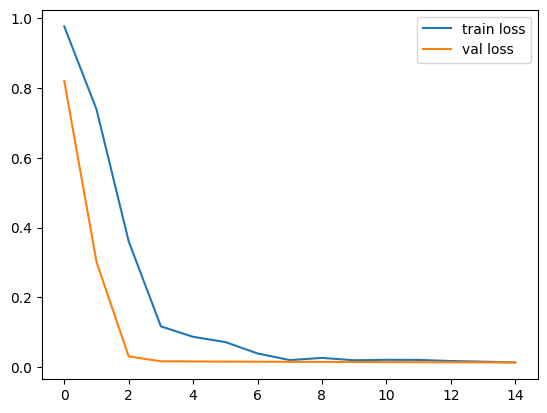

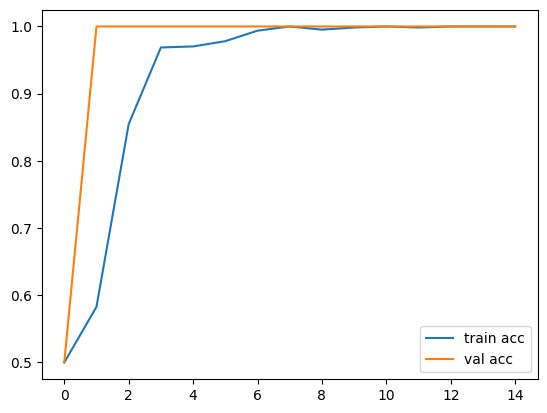

In [17]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

cnn.save('./Signature.h5')